(1122, 1795, 3)


Text(0.5, 1.0, 'Original Image')

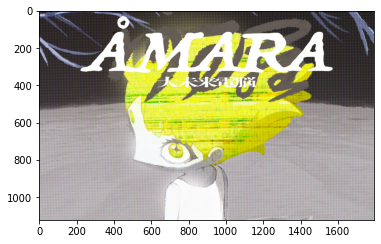

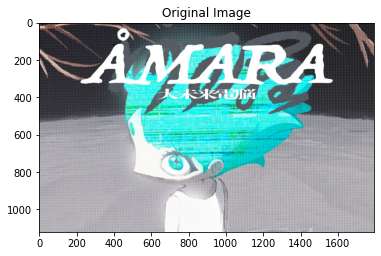

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2 as cv
from datetime import datetime 
import math
img=cv.imread('original image.jpg',1)
print(img.shape)
plt.figure()
plt.imshow(img)
cl_img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)#gray
type(gray_img.shape[:2])
gauss_b=cv.GaussianBlur(gray_img, (3,3), 0)#3*3 kernel
ret,binary=cv.threshold(gauss_b,127,255,cv.THRESH_BINARY)
plt.figure()
plt.imshow(cl_img,'gray')#source image
plt.title('Original Image')

In [16]:
def ideal_filter(img,flag):
    '''
    this function is to generate ideal filters, including#
    highpass, lowpass and wave band.
    '''
    dft=cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
    fft=np.fft.fftshift(dft)
    ranx,rany=img.shape
    xc,yc=int(ranx/2),int(rany/2)
    a=datetime.now()
    if(flag==0):#highpass
        mask=np.ones((ranx,rany,2),np.uint8)
        mask[xc-30:xc+30, yc-30:yc+30]=0
        string='High Pass Filter Image'
    elif(flag==1):#lowpass
        mask=np.zeros((ranx,rany,2),np.uint8)
        mask[xc-30:xc+30, yc-30:yc+30]=1
        string='Low Pass Filter Image'
    else:
        width=5 #variable
        radius=30
        mask=np.ones((ranx,rany,2),np.uint8)
        for i in range(ranx):
            for j in range(rany):
                dist=math.sqrt((i-xc)**2+(j-yc)**2)
                if (radius-width<dist<radius+width):
                    mask[i,j,0]=mask[i,j,1]=0
                else:
                    mask[i,j,0]=mask[i,j,1]=1
        string='Band Pass Filter Image'
    F=fft*mask
    i_fft=np.fft.ifftshift(F)
    new_img=cv.idft(i_fft)
    res=cv.magnitude(new_img[:,:,0],new_img[:,:,1])
    b=datetime.now()
    print(b-a)
    plt.figure(dpi=200,figsize=(6,10))
    plt.subplot(121), plt.imshow(img,'gray'), plt.title('Original Image'),plt.axis('off')
    plt.subplot(122), plt.imshow(res,'gray'), plt.title(string),plt.axis('off')
    plt.show()
    

0:00:00.094569


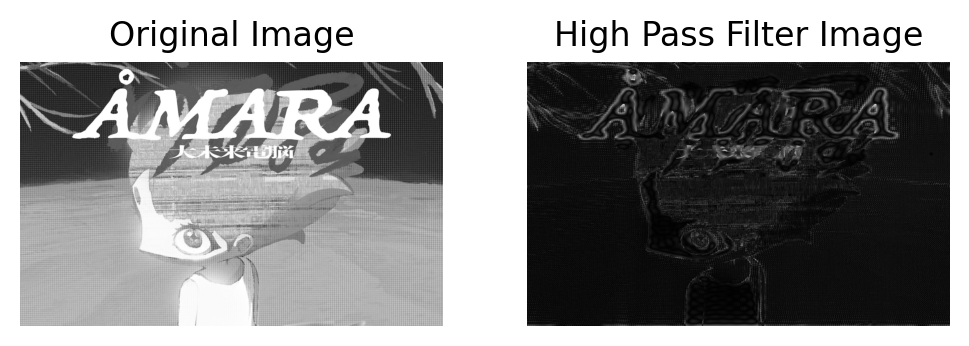

In [17]:
ideal_filter(gray_img,0)

0:00:00.042576


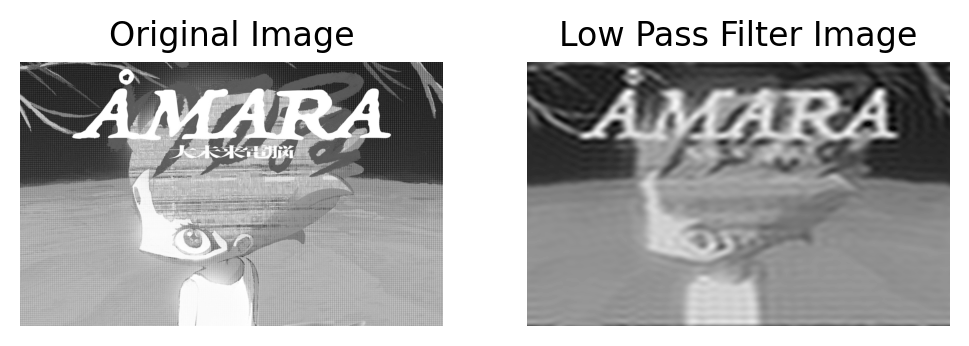

In [18]:
ideal_filter(gray_img,1)

0:00:01.573385


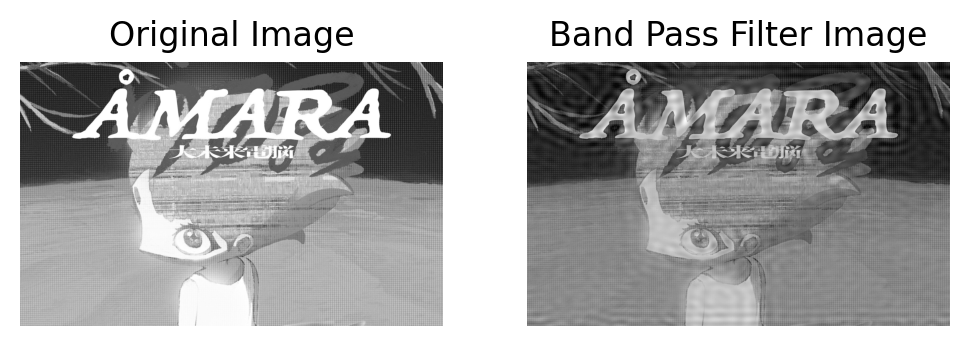

In [19]:
ideal_filter(gray_img,2)

In [4]:
#gaussian, butterworth need filter created
from scipy.fft import fft2, ifft2

def get_filter(img):
    ranx,rany=img.shape
    fft=fft2(img)
    u=np.arange(0,ranx)
    v=np.arange(0,rany)
    idx=np.where(u>ranx/2)
    idy=np.where(v>rany/2)
    u[idx]=(u[idx]-ranx)
    v[idy]=(v[idy]-rany)
    u=np.array(u)
    v=np.array(v)
    U,V=np.meshgrid(v,u)
    return U,V,img,fft

def gaussian_filter(img,cutoff,flag):
    a=datetime.now()
    U,V,img,fft=get_filter(img)
    d0=cutoff
    D=(U**2+V**2)
    if(flag==0):
        D=-(D/(2*(d0**2)))
        H=np.exp(D)
        string='Gaussian Lowpass Filter,Cut-off='+str(cutoff)
    if(flag==1):
        D=-(D/(2*(d0**2)))
        HP=np.exp(D)
        H=1-HP
        string='Gaussian Highpass Filter,Cut-off='+str(cutoff)
    G=H*fft
    out_img=ifft2(G)
    out_img_real=out_img.real
    b=datetime.now()
    print(b-a)
    plt.figure(dpi=200,figsize=(6,10))
    plt.subplot(121), plt.imshow(img,'gray'), plt.title('Original Image'),plt.axis('off')
    plt.subplot(122), plt.imshow(out_img_real,'gray'), plt.title(string),plt.axis('off')
    plt.show()

def butterworth_filter(img,order,cutoff,flag):
    a=datetime.now()
    U,V,img,fft=get_filter(img)
    n=order
    d0=cutoff
    D=np.sqrt(U**2+V**2)
    if(flag==0):#highpass
        H=(1/(1+(d0/D)**(2*n)))
        string='BW Highpass Filter with D0='+str(cutoff)+' n='+str(n)
    if(flag==1):
        H=(1/(1+(D/d0)**(2*n)))
        string='BW Lowpass Filter with D0='+str(cutoff)+' n='+str(n)
    G=H*fft
    out_img=ifft2(G)
    out_img_real=out_img.real
    b=datetime.now()
    print(b-a)
    plt.figure(dpi=200,figsize=(6,10))
    plt.subplot(121), plt.imshow(img,'gray'), plt.title('Original Image'),plt.axis('off')
    plt.subplot(122), plt.imshow(out_img_real,'gray'), plt.title(string),plt.axis('off')
    plt.show()


0:00:00.164777


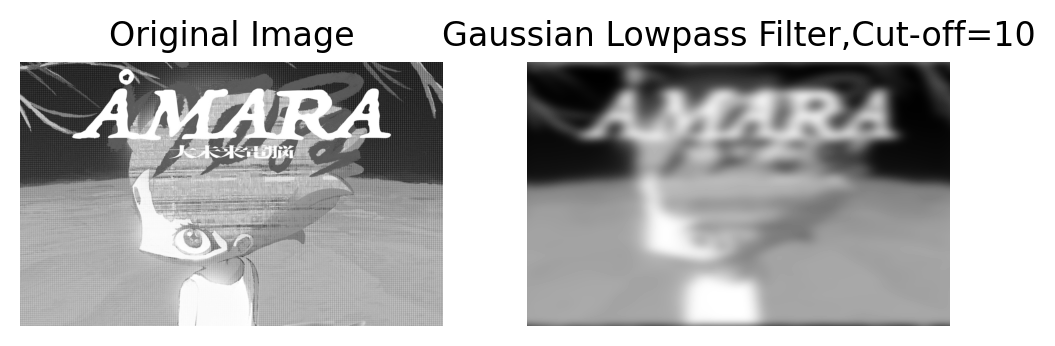

In [9]:
gaussian_filter(gray_img,10,0)

0:00:00.163332


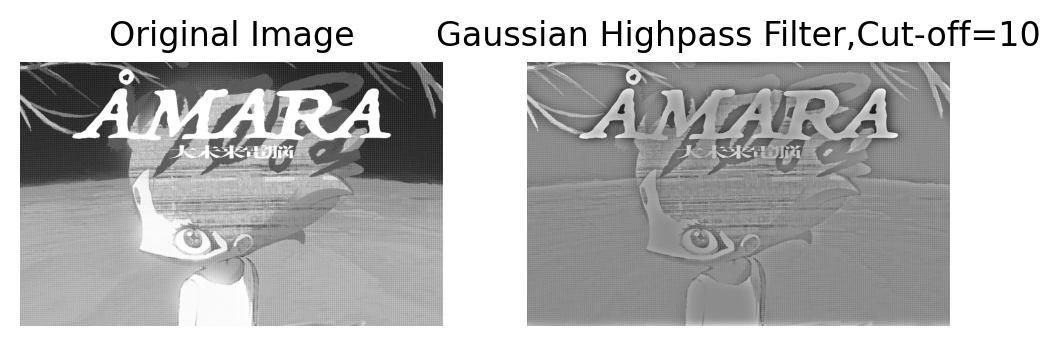

In [11]:
gaussian_filter(gray_img,10,1)

/tmp/ipykernel_63473/826365624.py:49: RuntimeWarning: divide by zero encountered in true_divide
  H=(1/(1+(d0/D)**(2*n)))


0:00:00.178143


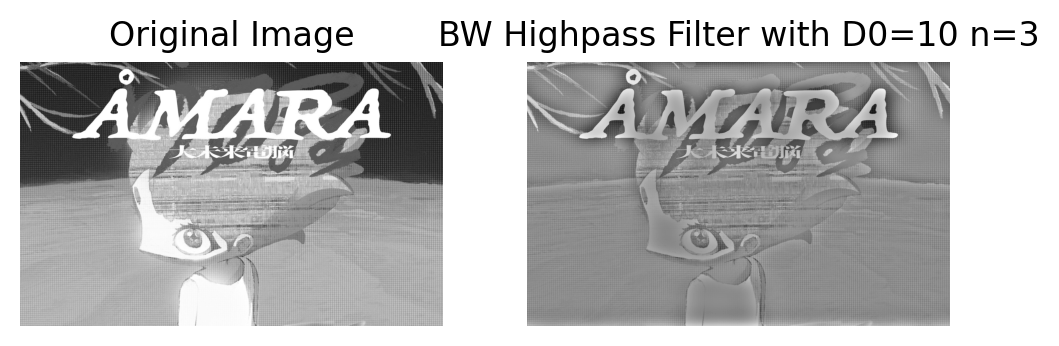

In [12]:
butterworth_filter(gray_img,3,10,0)

0:00:00.188791


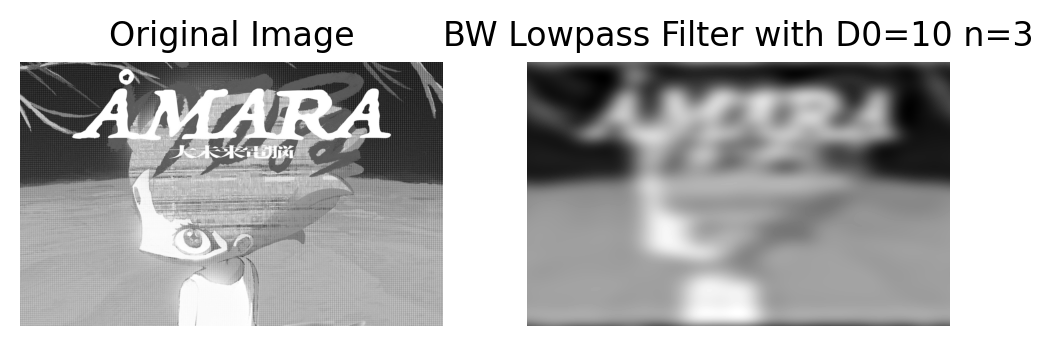

In [13]:
butterworth_filter(gray_img,3,10,1)

0:00:00.056131


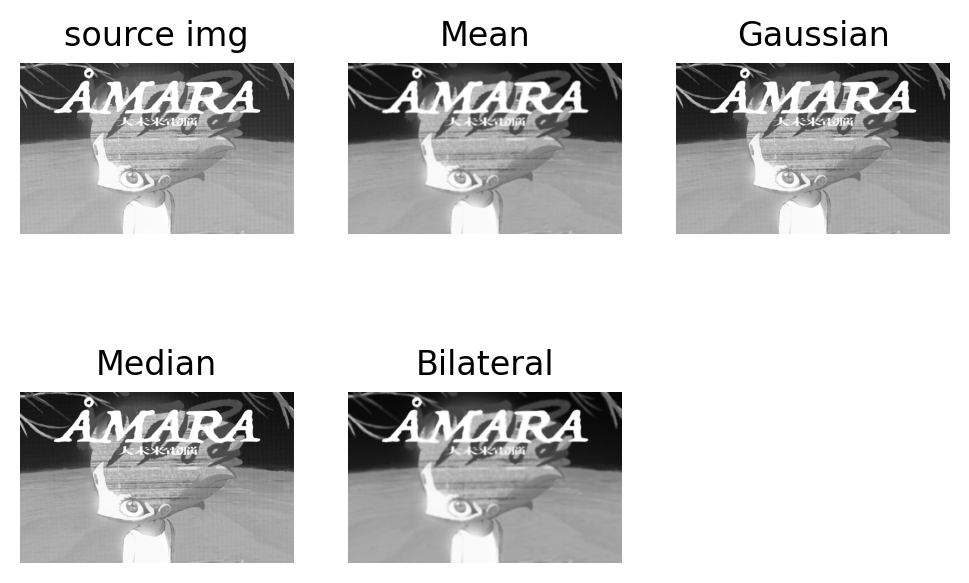

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
a=datetime.now()
img_mean = cv2.blur(gray_img, (10,10))
img_Guassian = cv2.GaussianBlur(gray_img,(5,5),0)
img_median = cv2.medianBlur(gray_img, 5)
img_bilater = cv2.bilateralFilter(gray_img,20,100,100)
b=datetime.now()
print(b-a)
titles = ['source img','Mean', 'Gaussian', 'Median', 'Bilateral']
imgs = [gray_img, img_mean, img_Guassian, img_median, img_bilater]
plt.figure(dpi=200)
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(imgs[i],'gray'),plt.axis('off')
    plt.title(titles[i])
plt.show()